In this Kernel, we will have a look at the insights for the data given by Incedo. Then on the Machine Learning part. 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # for data vizualization
import seaborn as sns
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test_file.csv', 'train_file.csv']


In [2]:
df_train= pd.read_csv('../input/train_file.csv')

In [3]:
df_train.head() # first 5 rows

,Patient_ID,YEAR,LocationDesc,Subtopic,Greater_Risk_Question,Description,Sample_Size,Sex,Race,Grade,GeoLocation,QuestionCode,StratID1,StratID2,StratID3,StratificationType,Greater_Risk_Probability
0,1,1995,"Houston, TX",1,Ever used cocaine,"any form of cocaine, such as powder, crack, or...",335.0,Female,Hispanic or Latino,4,"(29.760427, -95.369803)",H49,1,4,0,Local,7.4793
1,2,1997,"Houston, TX",0,Currently drank alcohol,"at least one drink of alcohol, on at least 1 d...",382.0,Total,Black or African American,4,"(29.760427, -95.369803)",H42,0,3,0,Local,49.6852
2,3,1993,Nevada,0,Had their first drink of alcohol before age 13...,other than a few sips,196.0,Female,White,0,"(39.493240390000494, -117.07184056399967)",H41,1,6,2,State,47.8132
3,4,2017,Pennsylvania,1,Ever used cocaine,"any form of cocaine, such as powder, crack, or...",104.0,Male,Asian,4,"(40.79373015200048, -77.86070029399963)",H49,2,2,0,State,3.4554
4,5,2007,"San Francisco, CA",1,Ever took steroids without a doctor's prescrip...,"pills or shots, one or more times during their...",100.0,Female,Multiple Race,4,"(37.77493, -122.419416)",H55,1,7,0,Local,0.0000


In [4]:
df_train.info() #basic information about the whole data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55399 entries, 0 to 55398
Data columns (total 17 columns):
Patient_ID                  55399 non-null int64
YEAR                        55399 non-null int64
LocationDesc                55399 non-null object
Subtopic                    55399 non-null int64
Greater_Risk_Question       55399 non-null object
Description                 55399 non-null object
Sample_Size                 55399 non-null float64
Sex                         55399 non-null object
Race                        55399 non-null object
Grade                       55399 non-null int64
GeoLocation                 52098 non-null object
QuestionCode                55399 non-null object
StratID1                    55399 non-null int64
StratID2                    55399 non-null int64
StratID3                    55399 non-null int64
StratificationType          55399 non-null object
Greater_Risk_Probability    55399 non-null float64
dtypes: float64(2), int64(7), object(8)
memory

In [5]:
df_train.describe(include='all') # explicit details about the data 

,Patient_ID,YEAR,LocationDesc,Subtopic,Greater_Risk_Question,Description,Sample_Size,Sex,Race,Grade,GeoLocation,QuestionCode,StratID1,StratID2,StratID3,StratificationType,Greater_Risk_Probability
count,55399.000000,55399.000000,55399,55399.000000,55399,55399,55399.000000,55399,55399,55399.000000,52098,55399,55399.000000,55399.000000,55399.000000,55399,55399.000000
unique,NaN,NaN,91,NaN,20,20,NaN,3,8,NaN,85,20,NaN,NaN,NaN,5,NaN
top,NaN,NaN,United States,NaN,Currently used marijuana,"also called grass, pot, or weed, one or more t...",NaN,Total,Total,NaN,"(40.712784, -74.005941)",H48,NaN,NaN,NaN,State,NaN
freq,NaN,NaN,2276,NaN,4421,4421,NaN,22057,22252,NaN,1396,4421,NaN,NaN,NaN,31878,NaN
mean,27700.000000,2007.674308,NaN,0.747270,NaN,NaN,566.206339,NaN,NaN,2.238488,NaN,NaN,0.897327,2.718479,1.708695,NaN,24.365664
std,15992.458118,6.906621,NaN,0.434581,NaN,NaN,1148.727489,NaN,NaN,1.494005,NaN,NaN,0.826494,2.516150,1.448596,NaN,20.492551
min,1.000000,1991.000000,NaN,0.000000,NaN,NaN,50.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000
25%,13850.500000,2003.000000,NaN,0.000000,NaN,NaN,165.000000,NaN,NaN,1.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,8.280050
50%,27700.000000,2009.000000,NaN,1.000000,NaN,NaN,275.000000,NaN,NaN,2.000000,NaN,NaN,1.000000,3.000000,2.000000,NaN,17.555600
75%,41549.500000,2013.000000,NaN,1.000000,NaN,NaN,560.500000,NaN,NaN,4.000000,NaN,NaN,2.000000,6.000000,3.000000,NaN,35.430750


In [6]:
df_train.Greater_Risk_Question.value_counts()

Currently used marijuana                                                                                                     4421
Had their first drink of alcohol before age 13 years                                                                         4265
Tried marijuana for the first time before age 13 years                                                                       4247
Currently drank alcohol                                                                                                      4204
Ever used cocaine                                                                                                            4072
Were offered, sold, or given an illegal drug on school property                                                              3894
Ever used marijuana                                                                                                          3734
Ever injected any illegal drug                                                            

We can see that the teenagers are more into pot. And from the above count we can imply that teenagers who did the first abuse before 13 years are more addicted to Drug Abuse. 

In [7]:
df_train.isnull().sum()#checking the null values for each variable

Patient_ID                     0
YEAR                           0
LocationDesc                   0
Subtopic                       0
Greater_Risk_Question          0
Description                    0
Sample_Size                    0
Sex                            0
Race                           0
Grade                          0
GeoLocation                 3301
QuestionCode                   0
StratID1                       0
StratID2                       0
StratID3                       0
StratificationType             0
Greater_Risk_Probability       0
dtype: int64

Only Geolocation is missing in the dataset. This could mean that people who do drugs don't stick to a same place for Drug abuse. They keep moving as there is a fear of being caught by elders or police as they are still minors.

In [8]:
df_test= pd.read_csv('../input/test_file.csv')
df_test.head()

,Patient_ID,YEAR,LocationDesc,Subtopic,Greater_Risk_Question,Description,Sample_Size,Sex,Race,Grade,GeoLocation,QuestionCode,StratID1,StratID2,StratID3,StratificationType
0,55400,2007,Navajo,1,Ever used marijuana,"also called grass, pot, or weed, one or more t...",157.0,Male,Hispanic or Latino,3,NaN,H46,2,4,1,Other
1,55401,2001,Florida,1,Currently used marijuana,"also called grass, pot, or weed, one or more t...",724.0,Total,Total,2,"(28.932040377000476, -81.92896053899966)",H48,0,0,4,State
2,55402,2005,"Charlotte-Mecklenburg County, NC",1,"Were offered, sold, or given an illegal drug o...",during the 12 months before the survey,105.0,Male,Hispanic or Latino,4,"(35.227087, -80.843127)",H58,2,4,0,Local
3,55403,2017,Nevada,1,Ever used synthetic marijuana,"also called ""K2,"" ""Spice,"" ""fake weed,"" ""King ...",157.0,Male,Total,2,"(39.493240390000494, -117.07184056399967)",H54,2,0,4,State
4,55404,2007,Illinois,1,Ever used heroin,"also called ""smack,"" ""junk,"" or ""China White,""...",174.0,Total,Black or African American,1,"(40.48501028300046, -88.99771017799969)",H51,0,3,3,State


In [9]:
df_train.columns # checking the number of columns in the dataset

Index(['Patient_ID', 'YEAR', 'LocationDesc', 'Subtopic',
       'Greater_Risk_Question', 'Description', 'Sample_Size', 'Sex', 'Race',
       'Grade', 'GeoLocation', 'QuestionCode', 'StratID1', 'StratID2',
       'StratID3', 'StratificationType', 'Greater_Risk_Probability'],
      dtype='object')

In [10]:
df_train.nunique()#checking all the unique items in the dataset

Patient_ID                  55399
YEAR                           14
LocationDesc                   91
Subtopic                        2
Greater_Risk_Question          20
Description                    20
Sample_Size                  3583
Sex                             3
Race                            8
Grade                           5
GeoLocation                    85
QuestionCode                   20
StratID1                        3
StratID2                        8
StratID3                        5
StratificationType              5
Greater_Risk_Probability    51821
dtype: int64

In [11]:
df_train.dtypes #checking the datatypes in the data, as we will need to hotencode the data for prediction purpose

Patient_ID                    int64
YEAR                          int64
LocationDesc                 object
Subtopic                      int64
Greater_Risk_Question        object
Description                  object
Sample_Size                 float64
Sex                          object
Race                         object
Grade                         int64
GeoLocation                  object
QuestionCode                 object
StratID1                      int64
StratID2                      int64
StratID3                      int64
StratificationType           object
Greater_Risk_Probability    float64
dtype: object

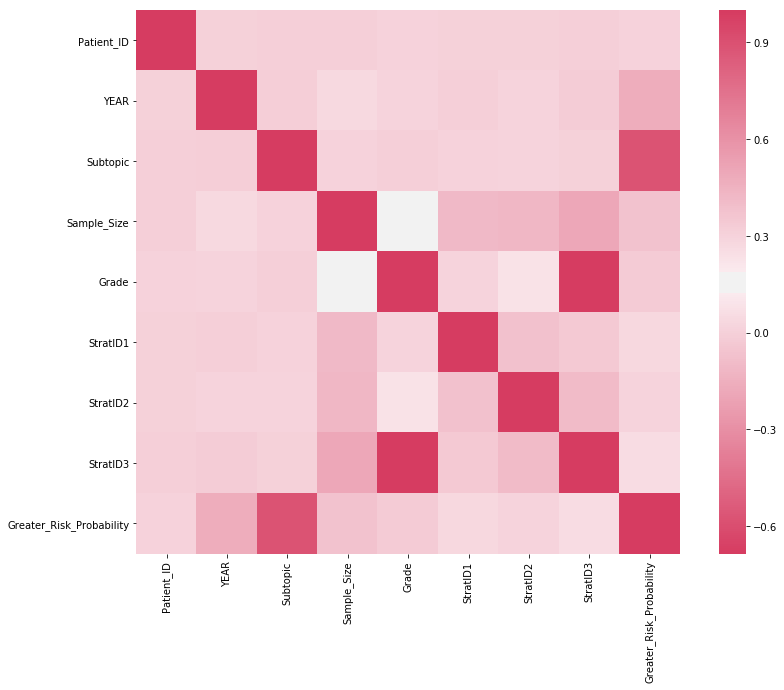

In [12]:
# correlation plot of the Variables in the data

f, ax = plt.subplots(figsize = (14, 10))

corr = df_train.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), 
            cmap = sns.diverging_palette(3, 3, as_cmap = True), square = True, ax = ax)

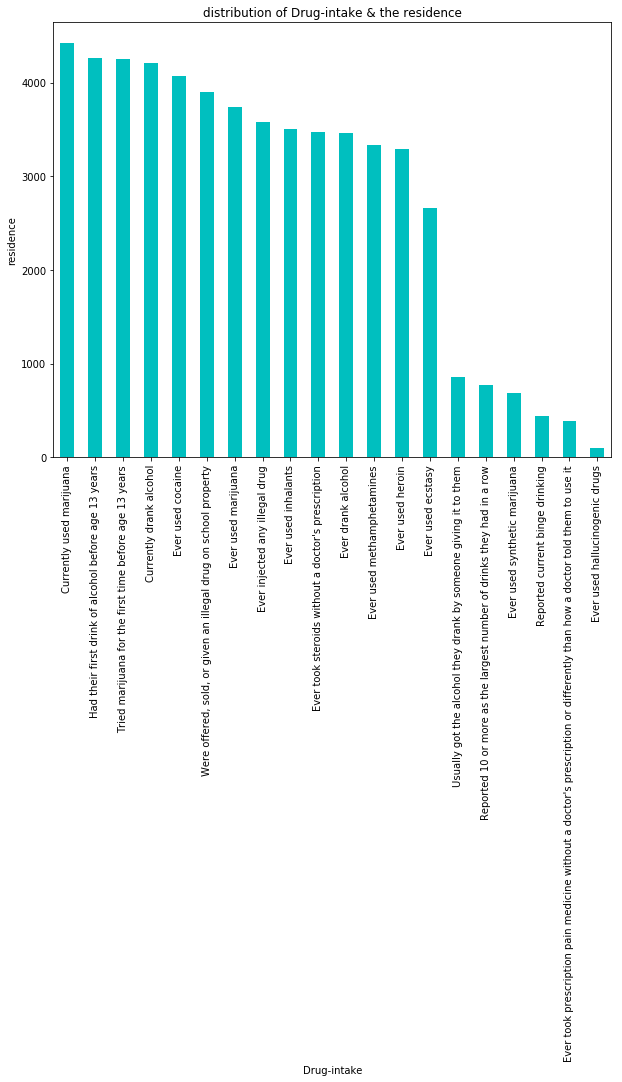

In [13]:
# visualising the distribution of Drug-abuse in the dataset

df_train['LocationDesc'].value_counts(normalize = True)
df_train['Greater_Risk_Question'].value_counts(dropna = False).plot.bar(color = 'c', figsize = (10, 8))

plt.title('distribution of Drug-intake & the residence')
plt.xlabel('Drug-intake')
plt.ylabel('residence')
plt.show()

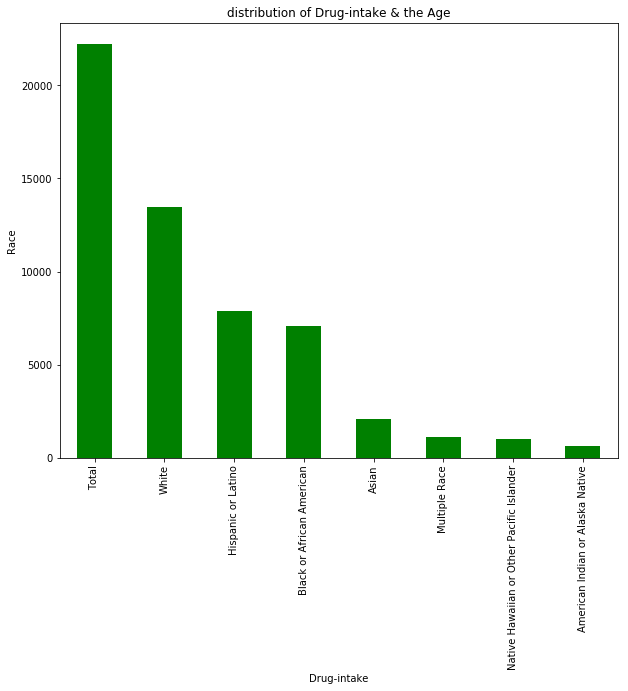

In [14]:
# visualising the distribution of Drug-intake & the Age  in the dataset

df_train['LocationDesc'].value_counts(normalize = True)
df_train['Race'].value_counts(dropna = False).plot.bar(color = 'green', figsize = (10, 8))

plt.title('distribution of Drug-intake & the Age')
plt.xlabel('Drug-intake')
plt.ylabel('Race')
plt.show()

The above chart shows us that Drug Abuse is more prevalant among the the natives, followed by Latinos and African Americans. This could be due to lack of proper education/parenting since very young age or could be due to influence of Social Media on young minds.

In [15]:
#checking the unique values in the Drug_User Column
df_train['Greater_Risk_Question'].value_counts()

Currently used marijuana                                                                                                     4421
Had their first drink of alcohol before age 13 years                                                                         4265
Tried marijuana for the first time before age 13 years                                                                       4247
Currently drank alcohol                                                                                                      4204
Ever used cocaine                                                                                                            4072
Were offered, sold, or given an illegal drug on school property                                                              3894
Ever used marijuana                                                                                                          3734
Ever injected any illegal drug                                                            

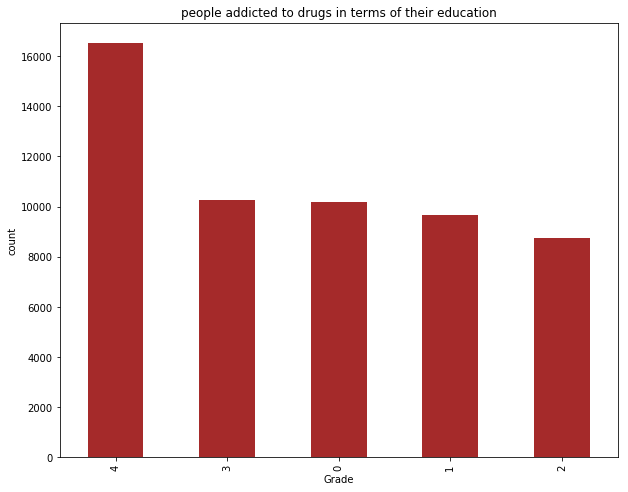

In [16]:
#checking the count of People who are addicted in terms of their Grade
df_train['LocationDesc'].value_counts(normalize = True)
df_train['Grade'].value_counts(dropna = False).plot.bar(color = 'brown', figsize = (10, 8))
plt.title('people addicted to drugs in terms of their education')
plt.xlabel('Grade')
plt.ylabel('count')
plt.show()

The above illustration illustrates an alarming pattern. It shows that teenagers who are more into Drug Abuse are people who are just in their teens and thats the time when adolesence hits. Everything seems cool age.

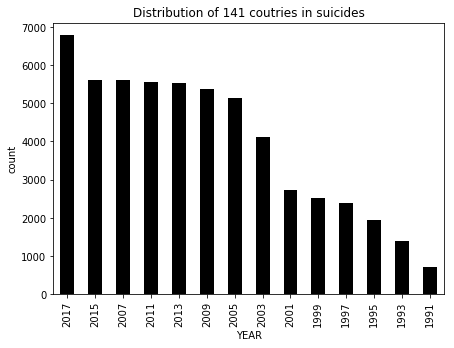

In [17]:
#Visualizing the YEAR Distribution in the Dataset
df_train['YEAR'].value_counts(normalize = True)
df_train['YEAR'].value_counts(dropna = False).plot.bar(color = 'black', figsize = (7, 5))

plt.title('Distribution of 141 coutries in suicides')
plt.xlabel('YEAR')
plt.ylabel('count')
plt.show()

In [18]:
df_train['YEAR'].nunique()

14

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 10.5 µs


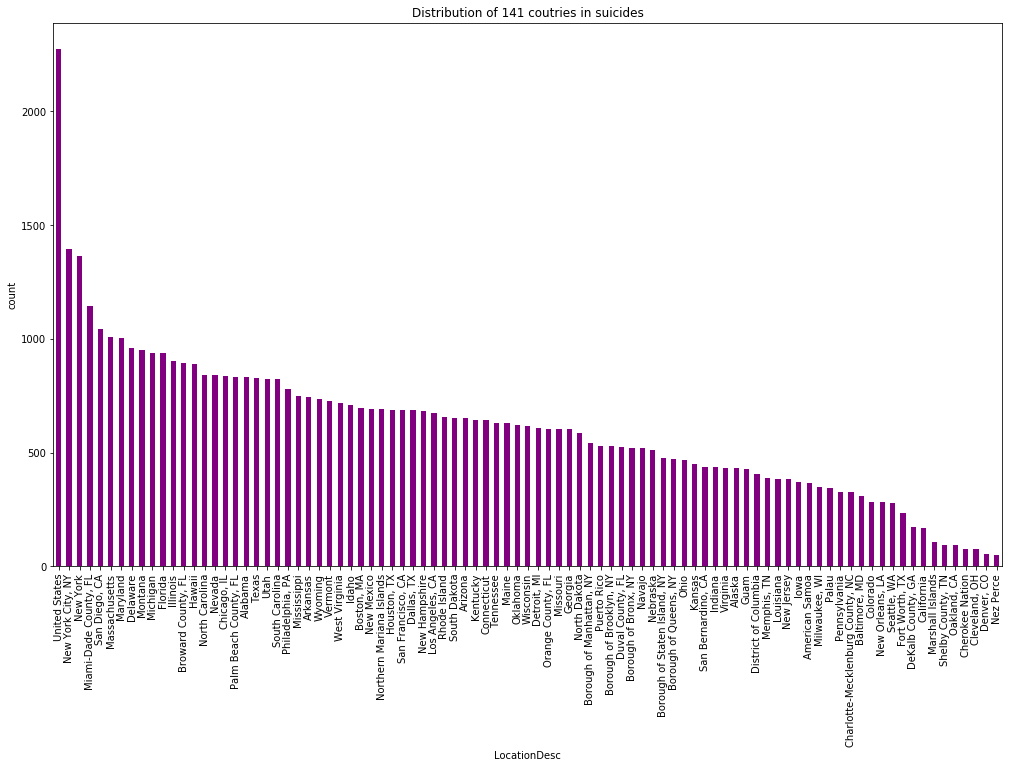

In [19]:
#Visualizing the Location Distribution in the Dataset
%time
df_train['LocationDesc'].value_counts(normalize = True)
df_train['LocationDesc'].value_counts(dropna = False).plot.bar(color = 'purple', figsize = (17, 10))

plt.title('Distribution of 141 coutries in suicides')
plt.xlabel('LocationDesc')
plt.ylabel('count')
plt.show()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 9.06 µs


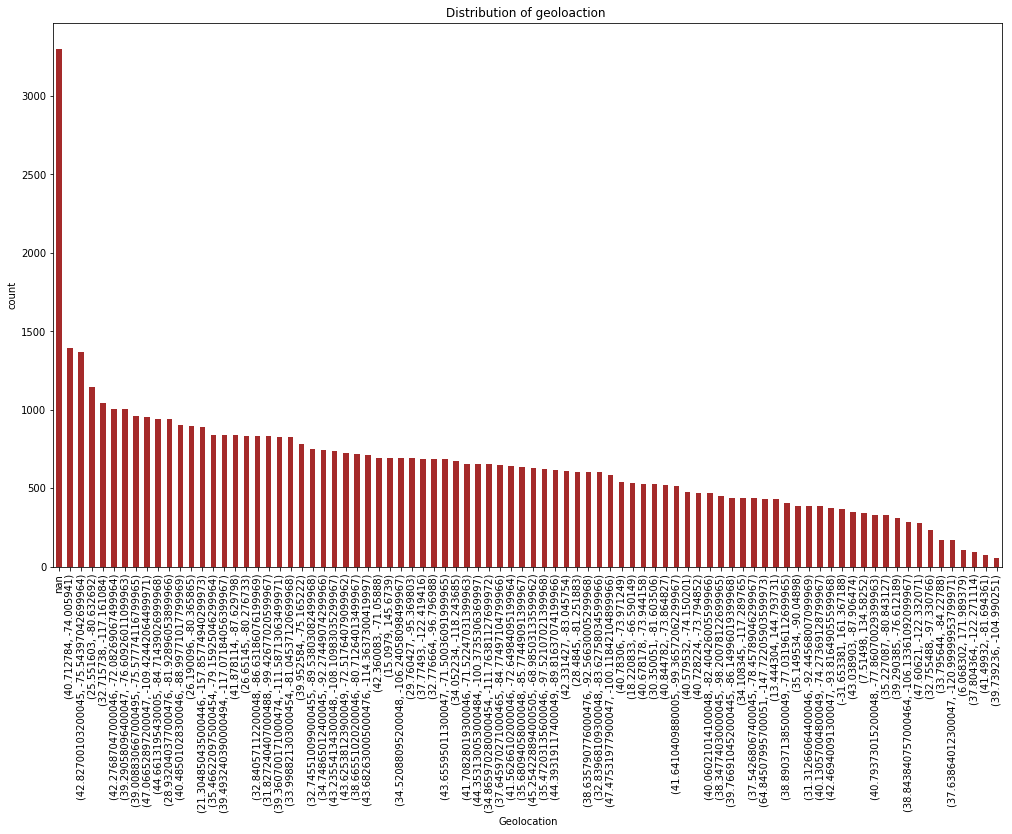

In [20]:
#Visualizing the Location Distribution in the Dataset
%time
df_train['GeoLocation'].value_counts(normalize = True)
df_train['GeoLocation'].value_counts(dropna = False).plot.bar(color = 'brown', figsize = (17, 10))

plt.title('Distribution of geoloaction ')
plt.xlabel('Geolocation')
plt.ylabel('count')
plt.show()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.34 µs


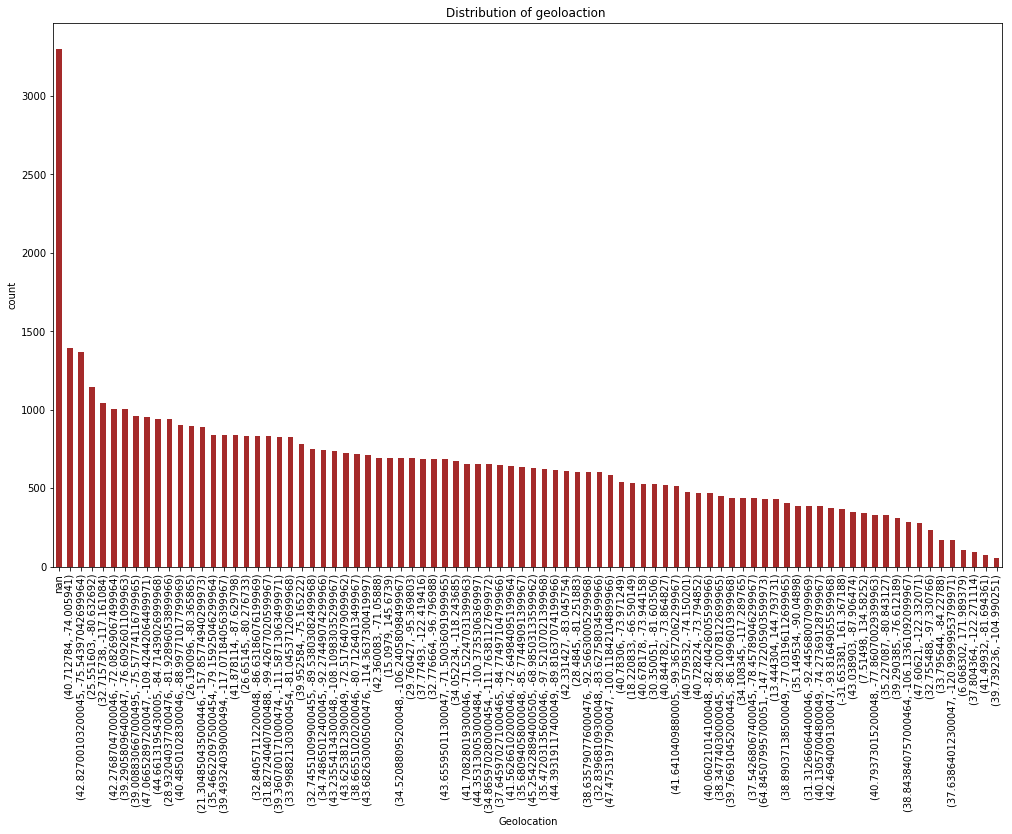

In [21]:
#Visualizing the Location Distribution in the Dataset
%time
df_train['GeoLocation'].value_counts(normalize = True)
df_train['GeoLocation'].value_counts(dropna = False).plot.bar(color = 'brown', figsize = (17, 10))

plt.title('Distribution of geoloaction ')
plt.xlabel('Geolocation')
plt.ylabel('count')
plt.show()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.82 µs


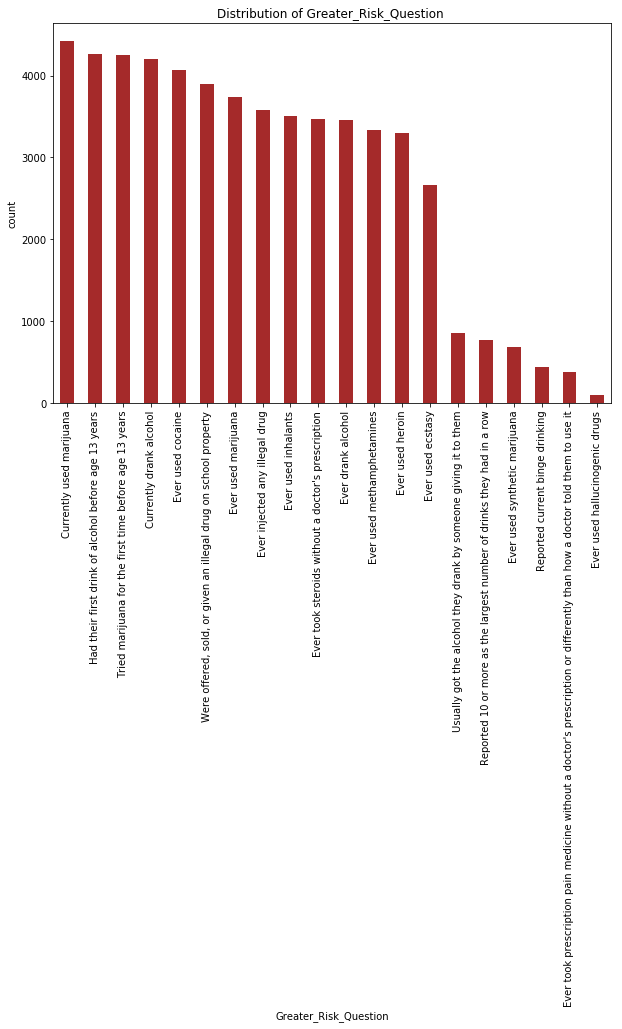

In [22]:
#Visualizing the choice of Drug Abuse in the Dataset
%time
df_train['Greater_Risk_Question'].value_counts(normalize = True)
df_train['Greater_Risk_Question'].value_counts(dropna = False).plot.bar(color = 'brown', figsize = (10, 7))

plt.title('Distribution of Greater_Risk_Question ')
plt.xlabel('Greater_Risk_Question')
plt.ylabel('count')
plt.show()

Above illustration shows us, people are more into Marijuana(Ganja) who have had their first drink by the age of 13. This means the more young people start drug abuse, more addicted they become in the longer run.

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.58 µs


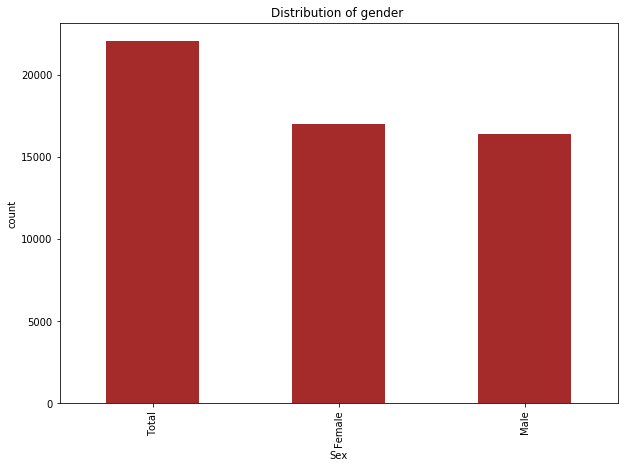

In [23]:
# Distribution of Addiction based on Gender

%time
df_train['Sex'].value_counts(normalize = True)
df_train['Sex'].value_counts(dropna = False).plot.bar(color = 'brown', figsize = (10, 7))

plt.title('Distribution of gender ')
plt.xlabel('Sex')
plt.ylabel('count')
plt.show()


The above figure shows, Addiction is equally spread across gender. Meaning Gender doesn't matter in this case. Teenagers of either Gender are equally prone to Addiction.

In [24]:
#total number of addicted people in the dataset
df_train['Description'].value_counts()

also called grass, pot, or weed, one or more times during the 30 days before the survey                                                                                                                           4421
other than a few sips                                                                                                                                                                                             4265
also called grass, pot, or weed                                                                                                                                                                                   4247
at least one drink of alcohol, on at least 1 day during the 30 days before the survey                                                                                                                             4204
any form of cocaine, such as powder, crack, or freebase, one or more times during their life                                                

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 10 µs


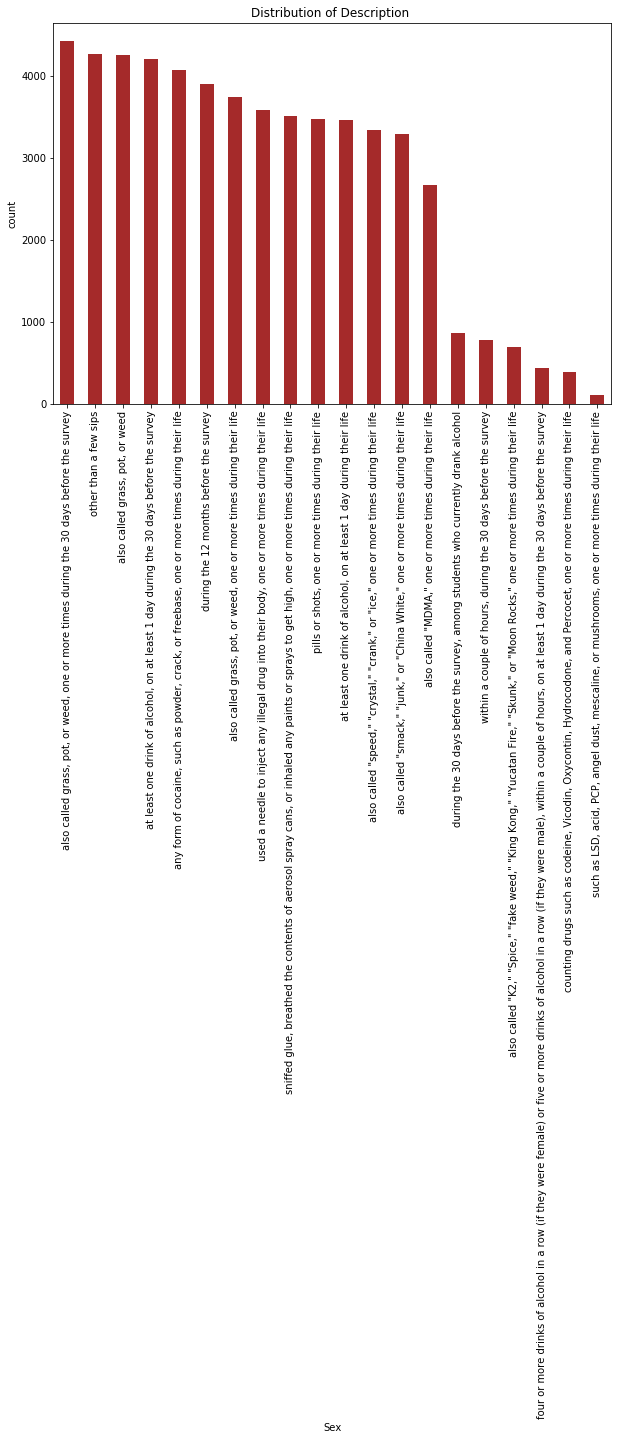

In [25]:
# Distribution of Description of Addiction
%time
df_train['Description'].value_counts(normalize = True)
df_train['Description'].value_counts(dropna = False).plot.bar(color = 'brown', figsize = (10, 7))

plt.title('Distribution of Description ')
plt.xlabel('Sex')
plt.ylabel('count')
plt.show()

The above figure illustrates that the number of people addicted to Marijuana are highest followed by Alcohol and then coke/heroin.